Assignment I
Haberman Dataset


In [ ]:
#The Haberman Dataset contains data of use cases of patients operated with Breast Cancer

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Convert given csv data to pandas dataframe
data = pd.read_csv("haberman.csv")

In [5]:
#Data Points in data
print(data.shape)

(306, 4)


In [7]:
#Columns in Data
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
#Parameters 
#a) Age : age of the patient at the time of operation
#b) Year : Year of operation 
#c) nodes : number of cancer positive auxillary lymph nodes in the patient at the time of operation
#d) Status : 1= Patient survived 5 years or longer
#             2= Patient died within 5 years

OBJECTIVE: Classify a new patient , as belonging to one of the two survial status given the 3 features.

In [9]:
print(data["status"].value_counts())

1    225
2     81
Name: status, dtype: int64


Mean and Standard Deviation

In [16]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [17]:
status1=data[data["status"]==1]
status2=data[data["status"]==2]

In [19]:
status1.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [21]:
status2.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [ ]:
#Observation(s):
#1) The Haberman dataset is imbalanced data with 306 datapoints 
#   where 225 belong to status 1 and 81 belong to status 2
#2) Patients who survived more than 5 years have comparitvely lesser active lymph nodes 

In [ ]:
MEDAIN #to check the correct data distribution of feature 'nodes' in the presence of outliers

In [30]:
print(np.median(status1["nodes"]))
print(np.median(status2["nodes"]))

0.0
4.0


In [32]:
from statsmodels import robust
print(robust.mad(status1["nodes"]))
print(robust.mad(status2["nodes"]))

0.0
5.930408874022408


UNIVARIATE ANALYSIS

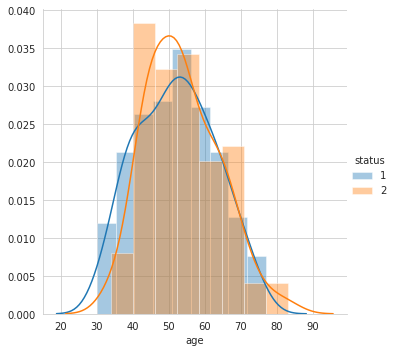

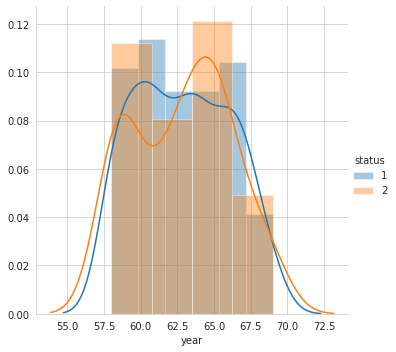

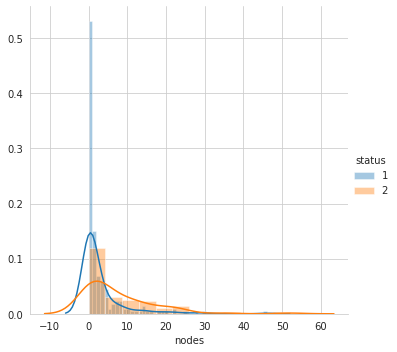

In [37]:
#Histogram
plt.close()
sns.FacetGrid(data,hue="status",height=5)\
    .map(sns.distplot,"age")\
    .add_legend()
plt.show()
#year
plt.close()
sns.FacetGrid(data,hue="status",height=5)\
    .map(sns.distplot,"year")\
    .add_legend()
plt.show()
#nodes
plt.close()
sns.FacetGrid(data,hue="status",height=5)\
    .map(sns.distplot,"nodes")\
    .add_legend()
plt.show()

In [ ]:
#Observation: It is evident that higher the number of active nodes , lesser the survival.

Counts: [0.31884058 0.04444444 0.0115942  0.02318841 0.0057971  0.00386473
 0.00966184 0.00193237 0.00386473 0.00386473 0.00193237 0.
 0.00193237 0.00193237 0.         0.         0.         0.
 0.         0.00193237]
Counts: [0.15194682 0.06647673 0.02374169 0.03323837 0.01899335 0.03323837
 0.00474834 0.01424501 0.02374169 0.00474834 0.         0.
 0.         0.00474834 0.         0.         0.         0.
 0.         0.00474834]


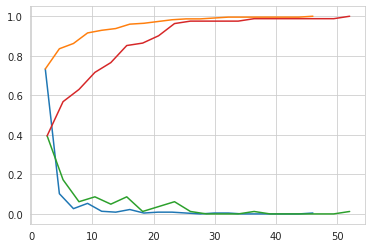

In [48]:
#PDF and CDF on nodes


#Status1
counts , bin_edges = np.histogram(status1["nodes"],bins=20,density=True)
print("Counts:",counts)
pdf=counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#Status2
counts , bin_edges = np.histogram(status2["nodes"],bins=20,density=True)
print("Counts:",counts)
pdf=counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

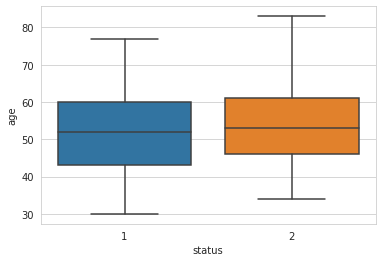

In [53]:
#BOXPLOT and VIOLIN PLOT
sns.boxplot(x='status',y='age',data=data)
plt.show()

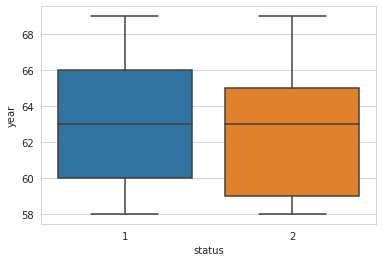

In [51]:
sns.boxplot(x='status',y='year',data=data)
plt.show()

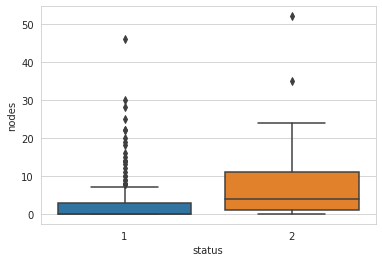

In [52]:
sns.boxplot(x='status',y='nodes',data=data)
plt.show()

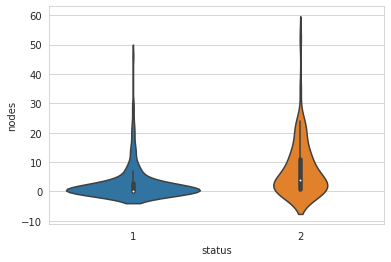

In [54]:
sns.violinplot(x='status',y='nodes',data=data)
plt.show()

In [71]:
print(np.percentile(status1["nodes"],np.arange(0,100,25)))
print(np.percentile(status2["nodes"],np.arange(0,100,25)))
print(np.percentile(status1["nodes"],90))
print(np.percentile(status2["nodes"],90))

[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
8.0
20.0


Observation: If we use the rule 
            if(nodes<4) then 
                Status 1
            else 
                Status 2
We can rightly classify 75% of status1 and 50% of status2                

Multivariate Analysis: To find which two features are most useful

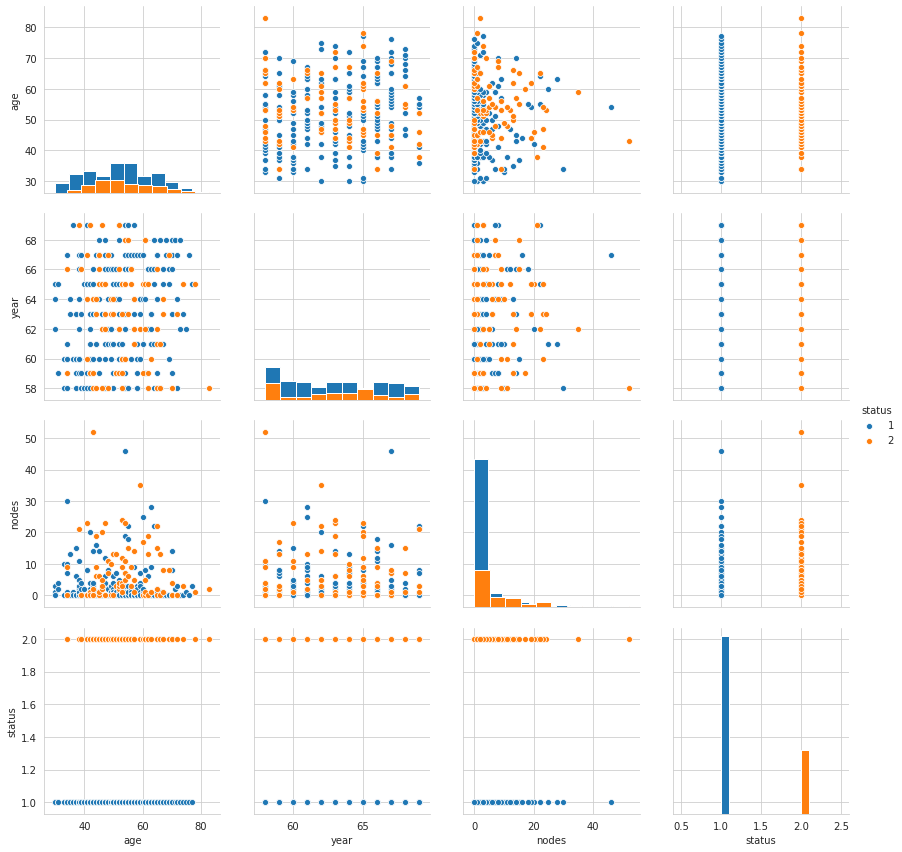

In [15]:
#Pair Plot using seaborn
sns.set_style("whitegrid")
sns.pairplot(data,hue="status",height=3,diag_kind='hist')
plt.show()

In [ ]:
#Contour Plot

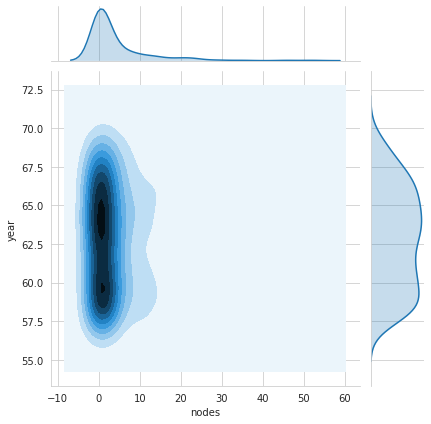

In [76]:
plt.close()
sns.jointplot(kind='kde',x="nodes",y="year",data=data)
plt.show()

Observation: The year vs Nodes seems like a better selection of features. There is much of overlapping but we can observe between year 62-65 there has been a lot of patients with active nodes
    

Conclusion:
    1) Data is imbalanced.
    2) Lot of overlapping.
    3) Number of active nodes serves as a better feature but it is not enough to build a model.